#Challenge

In [ ]:
# If additional packages are needed but are not installed by default, uncomment the last two lines of this cell
# and replace <package list> with a list of additional packages.
# This will ensure the notebook has all the dependencies and works everywhere

#import sys
#!{sys.executable} -m pip install <package list>

In [ ]:
import sys
!{sys.executable} -m pip install wget
!{sys.executable} -m pip install shutil

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
ERROR: Could not find a version that satisfies the requirement shutil (from versions: none)
ERROR: No matching distribution found for shutil


In [ ]:
# Libraries
import pandas as pd
import os
from shutil import unpack_archive
import matplotlib.pyplot as plt
pd.set_option("display.max_columns", 101)

## Dataset

In [ ]:
# Run this cell block to download and extract image data
!wget 'https://hr-projects-assets-prod.s3.amazonaws.com/1iaanii247i/8c7bc0c59ee6bcdb3646a1997606a9d0/test.zip'
!wget 'https://hr-projects-assets-prod.s3.amazonaws.com/1iaanii247i/ffe8804da24b94ee410a8730ba297dfc/train_0.zip'
!wget 'https://hr-projects-assets-prod.s3.amazonaws.com/1iaanii247i/5460fcc87e2d7f7e19c17f719e0df00a/train_1.zip'

print('Extracting Train Dataset : Label 1')
unpack_archive('train_1.zip', '')

print('Extracting Train Dataset : Label 0')
unpack_archive('train_0.zip', '')

print('Extracting Test Dataset')
unpack_archive('test.zip', '')

print('Dataset Extracted')


os.remove('train_1.zip')
os.remove('train_0.zip')
os.remove('test.zip')
print('Extra Files Removed')

--2022-06-21 12:20:54--  https://hr-projects-assets-prod.s3.amazonaws.com/1iaanii247i/8c7bc0c59ee6bcdb3646a1997606a9d0/test.zip
Resolving hr-projects-assets-prod.s3.amazonaws.com (hr-projects-assets-prod.s3.amazonaws.com)... 54.231.166.89
Connecting to hr-projects-assets-prod.s3.amazonaws.com (hr-projects-assets-prod.s3.amazonaws.com)|54.231.166.89|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 58948996 (56M) [application/zip]
Saving to: ‘test.zip’

test.zip            100%[===================>]  56.22M  24.8MB/s    in 2.3s    

2022-06-21 12:20:56 (24.8 MB/s) - ‘test.zip’ saved [58948996/58948996]

--2022-06-21 12:20:56--  https://hr-projects-assets-prod.s3.amazonaws.com/1iaanii247i/ffe8804da24b94ee410a8730ba297dfc/train_0.zip
Resolving hr-projects-assets-prod.s3.amazonaws.com (hr-projects-assets-prod.s3.amazonaws.com)... 54.231.166.89
Connecting to hr-projects-assets-prod.s3.amazonaws.com (hr-projects-assets-prod.s3.amazonaws.com)|54.231.166.89|:443... conn

## Data Description

Column | Description
:---|:---
`file` | Image name
`label` | Target Label (1/0)

In [ ]:
pip install Pillow

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import cv2 
import matplotlib.pyplot as plt
from PIL import Image, ImageOps
import numpy as np

In [ ]:
base_dir = '/content/train'

train_dir = base_dir


In [ ]:
nol = os.listdir('/content/train/0')
print(nol[:10])

satu = os.listdir('/content/train/1')
print(satu[:10])

['img_5264.jpg', 'img_64443.jpg', 'img_63151.jpg', 'img_68798.jpg', 'img_14715.jpg', 'img_70465.jpg', 'img_13668.jpg', 'img_4768.jpg', 'img_70729.jpg', 'img_9422.jpg']
['img_55108.jpg', 'img_31885.jpg', 'img_35327.jpg', 'img_1617.jpg', 'img_78675.jpg', 'img_101223.jpg', 'img_61593.jpg', 'img_29232.jpg', 'img_22712.jpg', 'img_42144.jpg']


In [ ]:
len(nol), len(satu)

(2026, 1989)

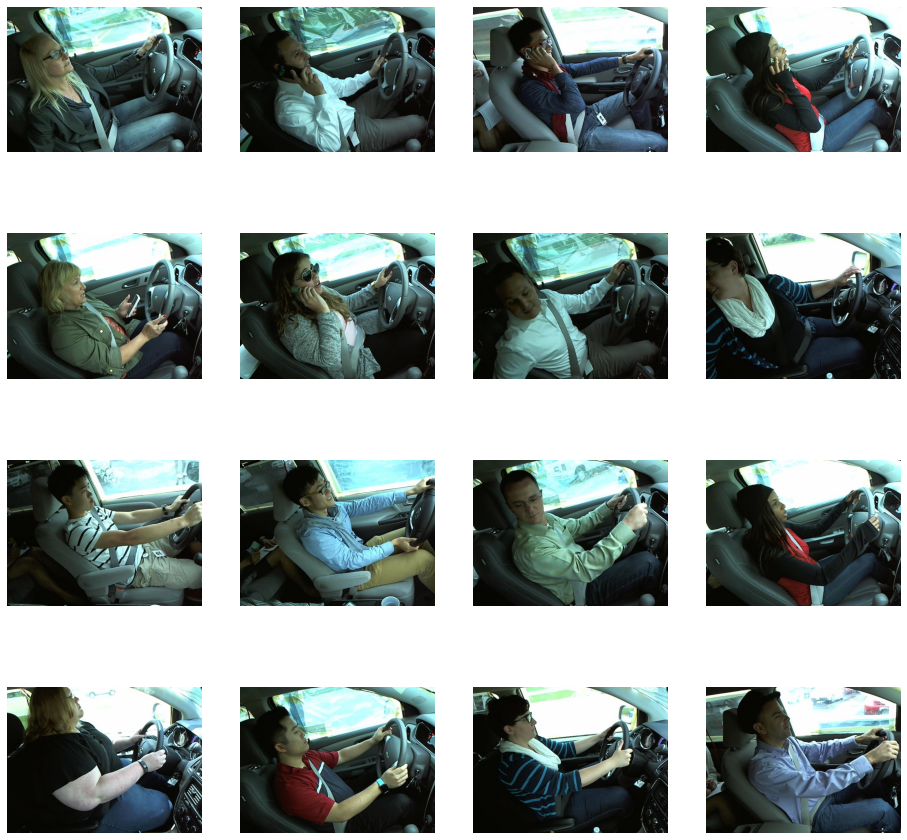

In [ ]:
# Show Images

%matplotlib inline

import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Parameters for our graph; we'll output images in a 4x4 configuration
nrows = 4
ncols = 4

# Index for iterating over images
pic_index = 0

fig = plt.gcf()
fig.set_size_inches(ncols * 4, nrows * 4)

pic_index += 8
next_nol_pix = [os.path.join('/content/train/0/', fname) 
                for fname in nol[pic_index-8:pic_index]]
next_satu_pix = [os.path.join('/content/train/1/', fname) 
                for fname in satu[pic_index-8:pic_index]]

for i, img_path in enumerate(next_nol_pix+next_satu_pix):
  sp = plt.subplot(nrows, ncols, i + 1)
  sp.axis('Off')

  img = mpimg.imread(img_path)
  plt.imshow(img)

plt.show()

In [ ]:

IMAGE_SIZE = (120,120)

from google.colab.patches import cv2_imshow


In [ ]:
import numpy as np 
import pandas as pd 
import os
import tensorflow.keras.layers as Layers
import tensorflow as tf
from tensorflow.keras import Sequential
from keras.layers import Conv2D, MaxPooling2D, Activation, Dropout, Flatten, Dense
from keras.callbacks import EarlyStopping , ModelCheckpoint, ReduceLROnPlateau
from sklearn.model_selection import train_test_split 
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras import models
from keras import layers
from tensorflow.keras.applications.resnet50 import ResNet50
from keras.models import *
from keras.layers import *
import keras
import warnings
import matplotlib.pyplot as plt
import cv2
from keras.preprocessing import image as IMG
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.applications.vgg19 import VGG19
from keras.applications.inception_v3 import InceptionV3, preprocess_input
warnings.filterwarnings('ignore')
from tqdm import tqdm
import tensorflow.keras.models as Models

In [ ]:
train_datagen = ImageDataGenerator(
                rescale = 1/255,
                validation_split = 0.2,
                preprocessing_function = None,
                rotation_range = 45, zoom_range = 0.2,
                horizontal_flip = True, vertical_flip = True,
                fill_mode = 'nearest', shear_range = 0.1,
                height_shift_range = 0.1, width_shift_range = 0.1)
valid_datagen = ImageDataGenerator(
                rescale = 1/255)

In [ ]:
train_generator = train_datagen.flow_from_directory(train_dir,
                                                    batch_size = 64,
                                                    class_mode = 'sparse', shuffle = True,
                                                    target_size = (IMAGE_SIZE[0], IMAGE_SIZE[1]))     

# Flow validation images in batches of 20 using test_datagen generator
validation_generator =  valid_datagen.flow_from_directory(train_dir,
                                                         batch_size  = 32,
                                                         class_mode  = 'sparse',shuffle = False, 
                                                         target_size = (IMAGE_SIZE[0], IMAGE_SIZE[1]))

Found 4015 images belonging to 2 classes.
Found 4015 images belonging to 2 classes.


## Machine Learning

Build a neural network that can classify the driver’s behaviour.
- **The model's performance will be evaluated on the basis of accuracy.**

In [ ]:
model_save = ModelCheckpoint('./yuhu.h5', save_best_only = True, save_weights_only = True, monitor = 'val_accuracy',
                             mode = 'auto', verbose = 1)
early_stop = EarlyStopping(monitor = 'val_accuracy', min_delta = 0.001, patience = 7, mode = 'max',
                           verbose = 1, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor = 'val_loss', factor = 0.75, patience = 2, min_delta=0.01,verbose =1, mode ='min' )

In [ ]:
resnet_model=ResNet50(weights=None,include_top=False,input_shape=(IMAGE_SIZE[0],IMAGE_SIZE[1],3))
# resnet_model.trainable = False
for layer in resnet_model.layers:
  layer.trainable = True
from tensorflow.keras import layers
last_layer = resnet_model.get_layer('conv3_block1_2_conv')
print('last layer output shape: ', last_layer.output_shape)
last_output = last_layer.output
from tensorflow.keras import Model

# Flatten the output layer to 1 dimension
x = layers.MaxPooling2D(5,5)(last_output)

x = layers.Flatten()(x)
# Add a fully connected layer with 1,024 hidden units and ReLU activation
x = layers.Dense(1024, activation='relu')(x)
# Add a dropout rate of 0.2
x = layers.Dropout(0.5)(x)                  
# Add a final sigmoid layer for classification
x = layers.Dense(2, activation='softmax')(x)

# Append the dense network to the base model
model = Model(resnet_model.input, x)
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])
# model.build(resnet_model.input)
model.summary()

last layer output shape:  (None, 15, 15, 128)
Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, 120, 120, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 126, 126, 3)  0           ['input_2[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 60, 60, 64)   9472        ['conv1_pad[0][0]']              
                                                                                                  
 conv1_bn (BatchNormalization)  (None, 60, 60,

In [ ]:
history = model.fit(train_generator,
                   epochs = 50,
                   validation_data = validation_generator,callbacks = [model_save, early_stop,reduce_lr]
                   )

Epoch 1/50
63/63 [==============================] - ETA: 0s - loss: 1.0458 - accuracy: 0.5200
Epoch 1: val_accuracy improved from -inf to 0.49539, saving model to ./yuhu.h5
63/63 [==============================] - 61s 941ms/step - loss: 1.0458 - accuracy: 0.5200 - val_loss: 0.7067 - val_accuracy: 0.4954 - lr: 0.0010
Epoch 2/50
63/63 [==============================] - ETA: 0s - loss: 0.6528 - accuracy: 0.6314
Epoch 2: val_accuracy improved from 0.49539 to 0.50137, saving model to ./yuhu.h5
63/63 [==============================] - 52s 830ms/step - loss: 0.6528 - accuracy: 0.6314 - val_loss: 0.7959 - val_accuracy: 0.5014 - lr: 0.0010
Epoch 3/50
63/63 [==============================] - ETA: 0s - loss: 0.6154 - accuracy: 0.6687
Epoch 3: val_accuracy improved from 0.50137 to 0.50461, saving model to ./yuhu.h5

Epoch 3: ReduceLROnPlateau reducing learning rate to 0.0007500000356230885.
63/63 [==============================] - 51s 811ms/step - loss: 0.6154 - accuracy: 0.6687 - val_loss: 1.9343

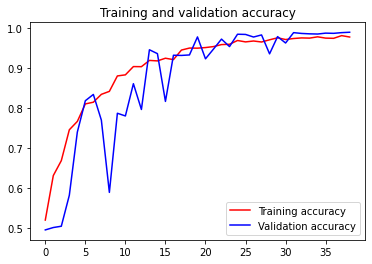

<Figure size 432x288 with 0 Axes>

In [ ]:
import matplotlib.pyplot as plt
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend(loc=0)
plt.figure()


plt.show()

In [ ]:
y_test = validation_generator.labels
y_pred = model.predict(validation_generator)

In [ ]:
y_test

array([0, 0, 0, ..., 1, 1, 1], dtype=int32)

In [ ]:
y_pred = tf.argmax(y_pred, axis = 1)

In [ ]:
y_pred

<tf.Tensor: shape=(4015,), dtype=int64, numpy=array([0, 0, 0, ..., 1, 1, 1])>

In [ ]:
from sklearn.metrics import confusion_matrix as cm
cm_ = cm(y_pred,y_test)
cm_

array([[2009,   27],
       [  17, 1962]])

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_pred,y_test))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      2036
           1       0.99      0.99      0.99      1979

    accuracy                           0.99      4015
   macro avg       0.99      0.99      0.99      4015
weighted avg       0.99      0.99      0.99      4015



In [ ]:
df = list(os.listdir('/content/test/'))
# test_images = [x

'img_64030.jpg'

In [ ]:
len(df)

1401

In [ ]:
for i in range(563):
  img_1 = IMG.load_img('/content/test/'+ df[i])

In [ ]:
for i in range(564,1041):
  img_2 = IMG.load_img('/content/test/'+ df[i])

In [ ]:
IMAGE_SIZE[0], IMAGE_SIZE[1]

In [ ]:
images = []
names = []
for i in range (len(df)):
  if i == 563:
    continue
  else:
    img = IMG.load_img('/content/test/'+df[i], target_size=(120, 120))
    x = IMG.img_to_array(img)
    x = x / 255
    images.append(x)
    names.append(df[i])

In [ ]:
X = np.asarray(images)
X.shape

(1400, 120, 120, 3)

In [ ]:
Y = model.predict(X)

In [ ]:
Y = np.argmax(Y,axis=1)

In [ ]:
Y

array([1, 0, 1, ..., 0, 0, 1])

> #### Task:
- **Submit the predictions on the test dataset using your optimized model** <br/>
    For each image in the test folder, predict the value of the label (0/1). You should submit a CSV file with a header row and one row per test entry. 

The file (`submissions.csv`) should have exactly 2 columns:
   - **file**
   - **label**
   

In [ ]:
len(names), Y.shape

(1400, (1400,))

In [ ]:
submission_df = pd.DataFrame({'file' : names, 'label': Y})

In [ ]:
#Submission
submission_df.to_csv('submissions.csv',index=False)